In [28]:
import pickle

import tensorflow as tf
import numpy as np

def load_data(name):
    with open(f'../data/processed/face_bmi_X_{name}.pkl', 'rb') as f:
        features = pickle.load(f)
    with open(f'../data/processed/face_bmi_y_bmi_{name}.pkl', 'rb') as f:
        bmi = pickle.load(f)
    return features, bmi

X_train, y_train = load_data('train')
X_test, y_test = load_data('test')

print(X_train.shape)
print(X_test.shape)

(1104, 2048)
(123, 2048)


In [33]:
from joblib import load

checkpoint_path = '../models/svm/svm.joblib'

# Loads the weights
svr = load(checkpoint_path)

def digitize(arr):
    return np.digitize(arr, bins=[18.5, 25., 30.])

preds_train = svr.predict(X_train)
cat_preds_train = digitize(preds_train)
cat_y_train = digitize(y_train)

preds_test = svr.predict(X_test)
cat_preds_test = digitize(preds_test)
cat_y_test = digitize(y_test)

[26.92462533 24.76969877 27.6530408  ... 23.90712137 27.78488763
 27.44884894]


In [32]:
from sklearn.metrics import *

# metrics
for dset, labels, pred in [('train', cat_y_train, cat_preds_train), ('test', cat_y_test, cat_preds_test)]:
    print(dset)
    metrics = [accuracy_score, confusion_matrix]
    for metric in metrics:
        print(metric.__name__,'\n',metric(labels, pred))

train
accuracy_score 
 0.4320652173913043
confusion_matrix 
 [[  0   3  13   0]
 [  0  82 385   4]
 [  0  29 340  28]
 [  0   7 158  55]]
test
accuracy_score 
 0.37398373983739835
confusion_matrix 
 [[ 0  1  1  0]
 [ 0  7 44  2]
 [ 0  5 35  5]
 [ 0  1 18  4]]


In [19]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

n_classes = 4

# Binarize the output
y_train = label_binarize(y_train, classes=range(n_classes))  # [0, 1, 2, 3]
y_test = label_binarize(y_test, classes=range(n_classes))  # [0, 1, 2, 3]
pred_train = label_binarize(cat_preds_train, classes=[0, 1, 2, 3])
pred_test = label_binarize(cat_preds_test, classes=[0, 1, 2, 3])

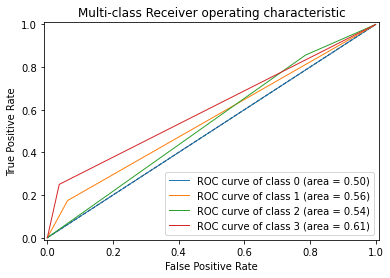

In [22]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], pred_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot all ROC curves
#colors = cycle(['darkorange', 'cornflowerblue', 'red', 'green'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#             label='ROC curve of class {0} (area = {1:0.2f})'
#             ''.format(i, roc_auc[i]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

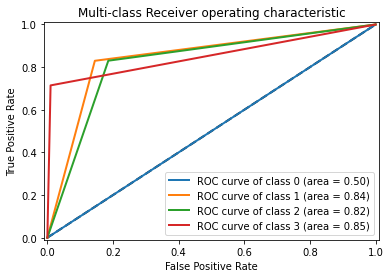

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Plot all ROC curves
#colors = cycle(['darkorange', 'cornflowerblue', 'red', 'green'])
#for i, color in zip(range(n_classes), colors):
#    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#             label='ROC curve of class {0} (area = {1:0.2f})'
#             ''.format(i, roc_auc[i]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()